<a href="https://colab.research.google.com/github/akhilkusuma0502/DeepLearningProjects/blob/master/Fashion_MNIST_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Computer Vision using Tensorflow demo**: Image Classification

In [42]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [51]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% Accuracy, Thus Cancelling Training!!!")
      self.model.stop_training=True

import necessary libraries required.
We need **tensorflow** library and **Keras** API in order to perform any deep learning neural nets.
we also array since we are dealing with matrices, we need **numpy** array . so import **numpy** as well

In [43]:
MNISt=keras.datasets.fashion_mnist

MNIST is the dataset offered by Keras to perform basic image classification. It involves fashion clothing items

**The next we need to do is Features Extraction**

In [45]:
(training_images , training_labels),(test_images,test_labels)=MNISt.load_data()

In the above code, i have used to sets where one set will capture training features and training labels and another set will capture test features and test labels.
load_Data() returns multiple parameters.

# **Lets Visualize one of the item from Training Images and see how it looks like**

9


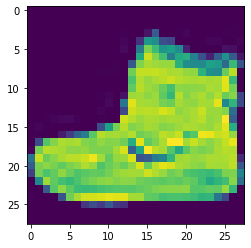

In [46]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])

The above image is 25*25 pixel image.

**It is better to Normalize the data. Neural Networks best if the values are between 0 and 1**

Since we are dealing with images , we need to understand that its pixel values ranges from 0 to 255 and hence divide the matrix/array by 255.

In [47]:
training_images=training_images/255.0
test_images=test_images/255.0

**Add layers**

In [48]:
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                  tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [52]:
callbacks=myCallback()

**Flatten**: The input shape is 28*28 , so flatten job is to take the rectangular input and flatten it to one-dimensional array and pass it to other layers.

**Dense**: Since input is Densely connected to 128 neurons. 128 is arbitary. You can try different numbers as well. Use Relu Activation since it outputs 0 or 1.

**Dense**: Output layer. Since we have 10 different categories in the training data. If so check the unique values of taining_labels.

**Softmax**: Commonly seen on final layers if there are multiple categories to output. The idea is simple , the output of the neuron is a probability value ans softmax helps us to set highest value to 1 and other to 0. 

In [53]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])
model.fit(training_images,training_labels,epochs=5,callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2806 - accuracy: 0.8975
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9014
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2567 - accuracy: 0.9044
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2477 - accuracy: 0.9073
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2376 - accuracy: 0.9112


**Compile the model**

While compiling the model , Three things to keep in mind.
**Optimizer**: There are different optimizers but the idea is to reduce the loss which is called Gradient Descent. The Goal of Gradient Descent is to find weights and bias that minimizes the J(w,b) i,e.., Cost Function.

**loss**: Choose sparse_categorical_crossentropy since we have categorical outputs.

**metrics**: What metrics do you want to cover. In here, we are covering accuracy.


# Fit the model after that using training images, training labels and number of epochs.

In [31]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3475 - accuracy: 0.8757


[0.3474550247192383, 0.8756999969482422]

Evaluate the model using test images.

Close to 98% Which is Great and our model with Traing also got 98% . Our neural network is working fine.

Lets see single picture from test data and see what it predicts.

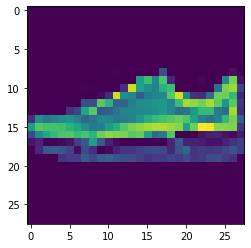

In [34]:
plt.imshow(test_images[9])

In [38]:
predictions=model.predict(test_images)

In [41]:
np.argmax(predictions[9])

7


0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot